<a href="https://colab.research.google.com/github/kavyakapoor200/Ecommerce-insight-toolkit/blob/main/Kavya_Kapoor_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets for data manipulation
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Previewing the datasets for A LOOK
print("Customers:")
print(customers.head())

print("\nProducts:") #\n for new line print
print(products.head())

print("\nTransactions:")
print(transactions.head())

# Checking the datatype so that i can know if it requires conversion or not
print(transactions['TransactionDate'].dtype)



Customers:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024

In [36]:
# AS data type was object so i changed them to datetime in ns
#I have checked for missing values and find none so i moved forward for conversion
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
print(transactions['TransactionDate'].dtype)
print(customers['SignupDate'].dtype)



datetime64[ns]
datetime64[ns]


Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


<ipython-input-43-abd1f24c5334>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


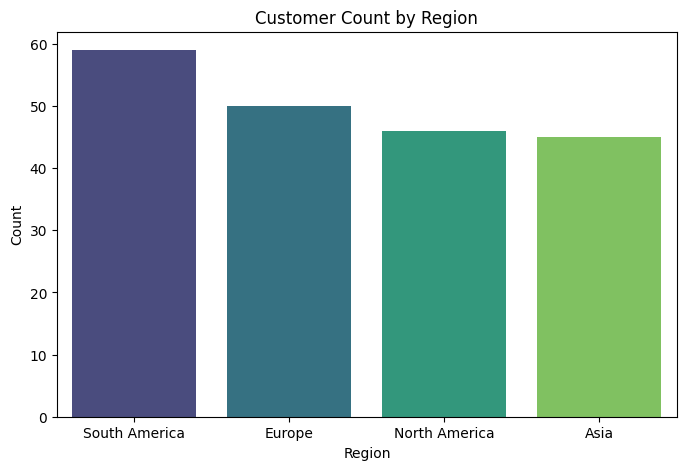

In [43]:
# Exploratory Data Analysis(EDA): Used seaborn for an easy interface
## Customers: Regional Distribution
region_counts = customers['Region'].value_counts()
print(region_counts) #values for an Idea
plt.figure(figsize=(8, 5)) #width is 8 in inches and height is 5 in inches for a big plot(doing this to avoid messyness)
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis") #see easy way
plt.title("Customer Count by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()


Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


<ipython-input-48-207257d14873>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")


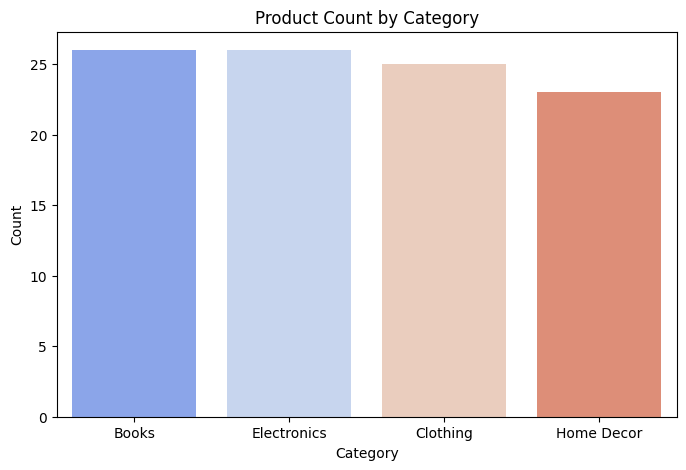

In [48]:
## Products: Category Distribution(similarly)
category_counts = products['Category'].value_counts()
print(category_counts)
plt.figure(figsize=(8, 5))
sns.barplot(x=category_counts.index, y=category_counts.values, palette="coolwarm")
plt.title("Product Count by Category")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


YearMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


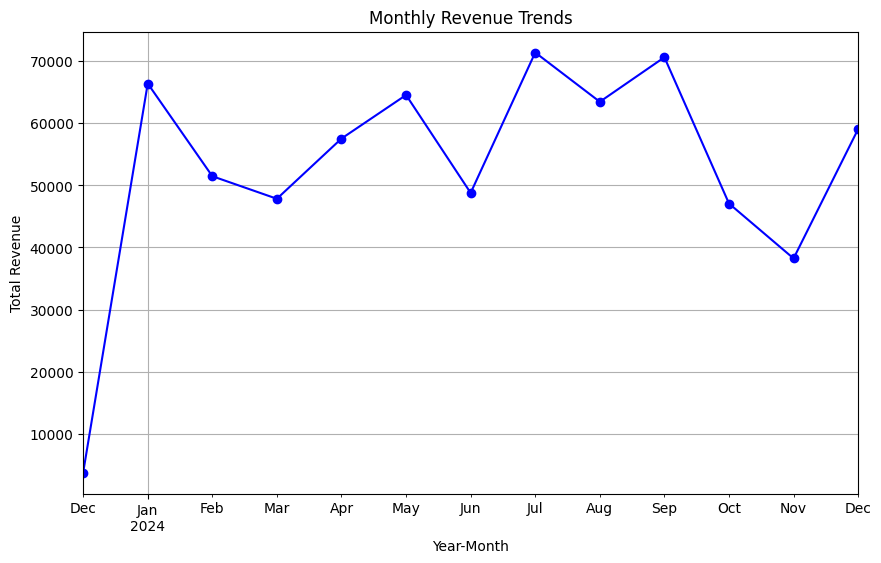

In [44]:
## Transactions: Monthly Revenue Trends
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M') #converting in to the monthly periods for an overview
monthly_revenue = transactions.groupby('YearMonth')['TotalValue'].sum() #divided in two groups year month and total revenue in that month
print(monthly_revenue) #for an idea
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Revenue Trends")
plt.xlabel("Year-Month")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()

In [46]:
# Merging datasets for deeper analysis or an solid overview
#from left merged the customer csv and product csv
merged_data = transactions.merge(customers, on='CustomerID', how='left')
merged_data = merged_data.merge(products, on='ProductID', how='left')
print(merged_data.head()) #to avoid confusion as i get a lot of it


  TransactionID CustomerID ProductID     TransactionDate  Quantity  \
0        T00001      C0199      P067 2024-08-25 12:38:23         1   
1        T00112      C0146      P067 2024-05-27 22:23:54         1   
2        T00166      C0127      P067 2024-04-25 07:38:55         1   
3        T00272      C0087      P067 2024-03-26 22:55:37         2   
4        T00363      C0070      P067 2024-03-21 15:10:10         3   

   TotalValue  Price_x YearMonth     CustomerName         Region SignupDate  \
0      300.68   300.68   2024-08   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68   2024-05  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68   2024-04  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68   2024-03  Travis Campbell  South America 2024-04-11   
4      902.04   300.68   2024-03    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electroni

Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


<ipython-input-47-39c45321f493>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="rocket")


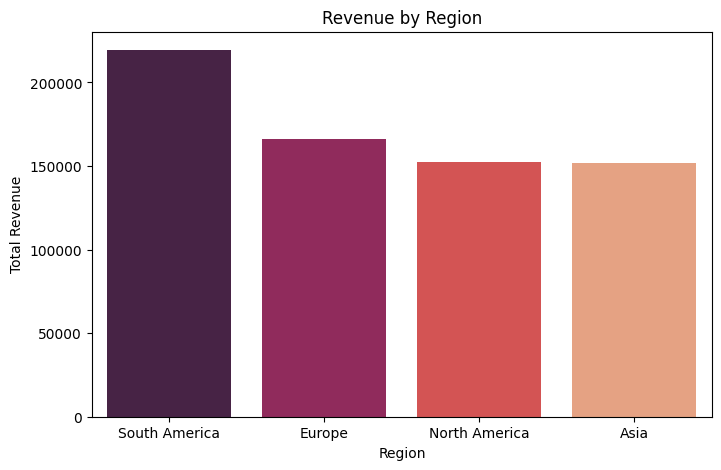

In [47]:
## Revenue by Region(its show timeeee)
region_revenue = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False) #grouping data in descending order
print(region_revenue)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_revenue.index, y=region_revenue.values, palette="rocket")
plt.title("Revenue by Region")
plt.xlabel("Region")
plt.ylabel("Total Revenue")
plt.show()



Top 5 Best-Selling Products:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


<ipython-input-56-9c945a02c27b>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_sales.head(5).index, y=product_sales.head(5).values, palette="magma")


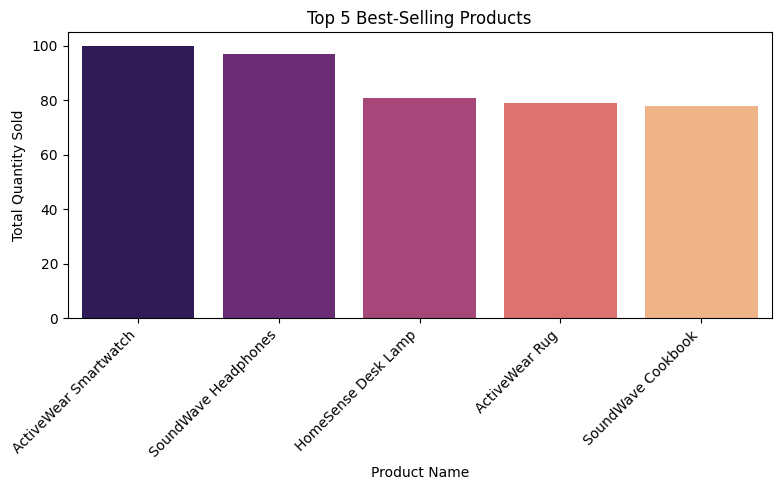

In [56]:

## Best-selling products analysis

# Calculate total quantity sold for each product
product_sales = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)

# Display the top 5 best-selling products
print("\nTop 5 Best-Selling Products:")
print(product_sales.head(5))

# Visualize the top 5 best-selling products
plt.figure(figsize=(8, 5))
sns.barplot(x=product_sales.head(5).index, y=product_sales.head(5).values, palette="magma")
plt.title("Top 5 Best-Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()




In [21]:
# Save Merged Dataset getting in case.
merged_data.to_csv("Merged_Data.csv", index=False)

print("EDA Completed. Insights can now be derived from the visualizations.")

EDA Completed. Insights can now be derived from the visualizations.
